In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install seaborn

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
##### Data Analyse
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

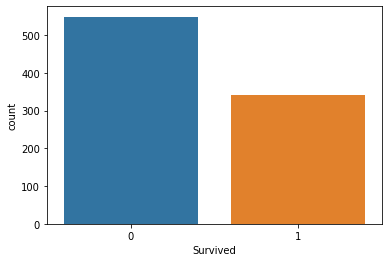

In [7]:
sns.countplot(df['Survived'])

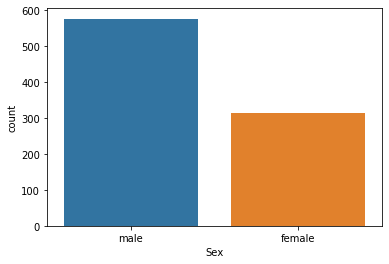

In [8]:
sns.countplot(df['Sex'])

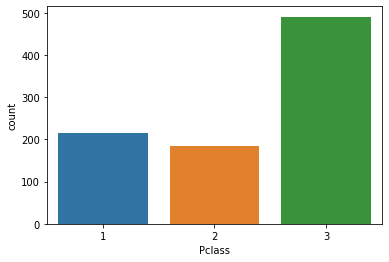

In [9]:
sns.countplot(df['Pclass'])

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

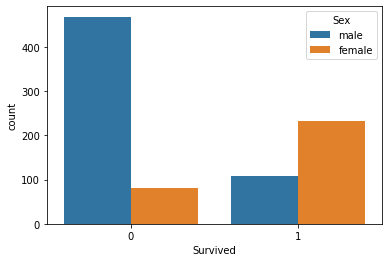

In [11]:
sns.countplot(df['Survived'],hue=df['Sex'])

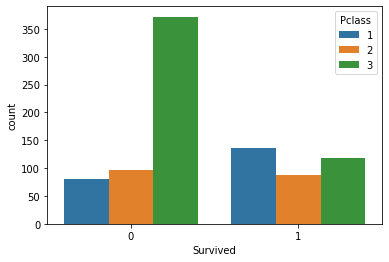

In [12]:
sns.countplot(df['Survived'],hue=df['Pclass'])

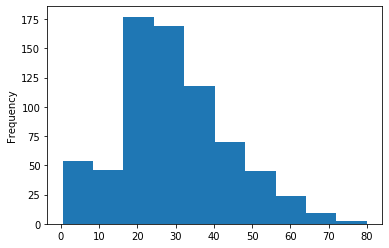

In [13]:
df['Age'].plot.hist()

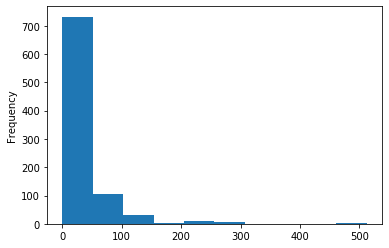

In [14]:
df['Fare'].plot.hist()

In [15]:
#### Data Wrangling
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [20]:
mean_age = df['Age'].mean()
mean_age = mean_age.round(2)
mean_age

29.7

In [21]:
df['Age'].fillna(mean_age,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [24]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
df.drop(["Sex"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [26]:
df['Sex'] = sex
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [27]:
#### Apply logistic regression

In [29]:
y = df['Survived']   #target
x = df[['Age','Sex','Fare','Pclass','SibSp','Parch']]

In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
x

,Age,Sex,Fare,Pclass,SibSp,Parch
0,22.0,1,7.2500,3,1,0
1,38.0,0,71.2833,1,1,0
2,26.0,0,7.9250,3,0,0
3,35.0,0,53.1000,1,1,0
4,35.0,1,8.0500,3,0,0
...,...,...,...,...,...,...
886,27.0,1,13.0000,2,0,0
887,19.0,0,30.0000,1,0,0
888,29.7,0,23.4500,3,1,2
889,26.0,1,30.0000,1,0,0


In [34]:
### split data in train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [33]:
!pip install -U scikit-learn

In [35]:
#### Create the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
### Train the model
model.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
y_pred = model.predict(xtest)

In [38]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [39]:
ytest

576    1
674    0
33     0
139    0
104    0
      ..
788    1
197    0
843    0
609    1
656    0
Name: Survived, Length: 179, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
cm

array([[96, 14],
       [22, 47]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,y_pred)
ac

0.7988826815642458